# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis
'''
Null Hypothesis - The new template isn't effective and no increase in perfomance will be recorded
'''

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
'''
Alternative Hypothesis - The new template will be effective and there will be upto 1% 
increase in the perfomance
'''

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [ ]:
# Calculate the required sample size
from statsmodels.stats.power import (
    TTestIndPower,
    TTestPower)
power_analysis = TTestIndPower()
mean_difference = 0.01
sd = 0.0475
effect_size = mean_difference / sd
sample_size_required = power_analysis.solve_power(effect_size = effect_size,
                                                  alpha = 0.05,
                                                  power = 0.8, alternative='larger')
sample_size_required


279.6667468021841

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

<class 'int'> 0.01
<class 'int'> 0.05
<class 'int'> 0.1


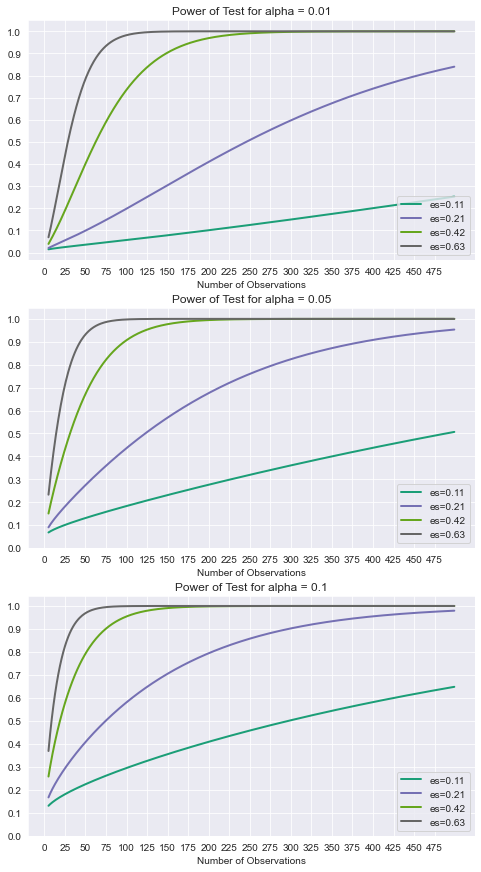

In [7]:
#Your code; plot power curves for the various alpha and effect size combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

sd = 0.0475
e_sizes = [mu_delta/sd for mu_delta in [.005,.01,.02,.03]]
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(8,15))
for n, alpha in enumerate([.01, .05, .1]):
    print(type(n), alpha)
    ax = axes[n]
    power_analysis.plot_power(dep_var="nobs",
                              nobs = np.array(range(5,500)),
                              effect_size=e_sizes,
                              alpha=alpha,
                              ax=ax, 
                              alternative='larger')
    ax.set_title('Power of Test for alpha = {}'.format(alpha))
    ax.set_xticks(list(range(0,500,25)))
    ax.set_yticks(np.linspace(0,1,11))

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [ ]:
'''
*Proposed Experimental Design*

Type: A/B test (control = old template, treatment = new template)

Test: Proportion Z-test (comparing response rates)

Design:

Randomly split audience into two groups

Equal sample sizes per group (based on calculated minimum)

Run for fixed time (e.g., 1-2 weeks)

*Advantages* 

Easy to set up and understand

Clear success metric (response rate)

Low risk with controlled test size

Helps build internal confidence in the new design

*Disadvantages*

Need a big sample to spot a small change

Small risk of fewer responses if the new version flops

Timing or audience mood might skew results
'''

'\n*Proposed Experimental Design*\n\nType: A/B test (control = old template, treatment = new template)\n\nTest: Proportion Z-test (comparing response rates)\n\nDesign:\n\nRandomly split audience into two groups\n\nEqual sample sizes per group (based on calculated minimum)\n\nRun for fixed time (e.g., 1–2 weeks)\n\n*Advantages* \n\nEasy to set up and understand\n\nClear success metric (response rate)\n\nLow risk with controlled test size\n\nHelps build internal confidence in the new design\n\n*Disadvantages*\n\nNeed a big sample to spot a small change\n\nSmall risk of fewer responses if the new version flops\n\nTiming or audience mood might skew results\n'

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.